In [ ]:
# Author: Chi Nguyen

In [250]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams["font.family"] = "SimSong"

In [251]:
china = gpd.read_file('data/china_prefecture.json')
# china_eng = china.drop(columns=['NL_NAME_1', 'NL_NAME_2'])

In [252]:
china.loc[china.index == 138]

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
138,HKG.8_1,CHN,China,CHN.HKG,HongKong,NA,SaiKung,<Null>,NA,District,District,NA,HK.SK,"MULTIPOLYGON (((114.2982 22.256, 114.2968 22.2..."


<Axes: >

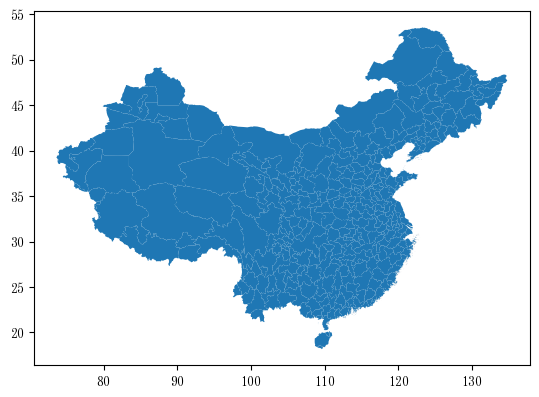

In [253]:
china.plot()

In [254]:
china['label'] = china.NAME_2

In [255]:
china['label_pos'] = china['geometry'].apply(lambda x: [* x.representative_point().coords[0]])

In [256]:
def shift_label_pos(region, dx, dy):
    i = china.loc[china['NAME_1'] == region].index[0]
    v = china.at[i, 'label_pos']
    w = [v[0] + dx, v[1] + dy]
    china.at[i, 'label_pos'] = w

shift_label_pos('HongKong', 1,-1)
shift_label_pos('Macau', -1,-1)
shift_label_pos('Hebei', 0, -1)

In [257]:
def show_region(cities):
    highlighted = []

    for city in cities:
        city_lower = city.lower()
        r = china.loc[china['NAME_2'].str.lower() == city_lower]

        if len(r) == 0:
            r = china.loc[china['VARNAME_2'].str.lower() == city_lower]

        if len(r) == 0:
            r = china.loc[china['label'].str.lower() == city_lower]

        if len(r) == 0:
            raise ValueError(f'No region named "{city}" found.')

        highlighted.append(r)

    # Concatenate all matched regions
    highlighted_gdf = pd.concat(highlighted)

    # Plot map
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.axis('off')
    ax.set_title('Map of China with Selected Regions Highlighted and Labeled')

    # Plot base and highlighted regions
    china.plot(edgecolor='darkgrey', facecolor='lightgrey', ax=ax)
    highlighted_gdf.plot(facecolor='#9999ff', edgecolor='black', ax=ax)

    # Add labels using NAME_2 and centroids
    for idx, row in highlighted_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['NAME_2'], fontsize=12, ha='center', color='red')
        #population = row['POPULATION']
        #label = f"{name}\nPop: {population:,}"
        #ax.text(centroid.x, centroid.y, label, fontsize=10, ha='center', va='center', color='black', bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7))

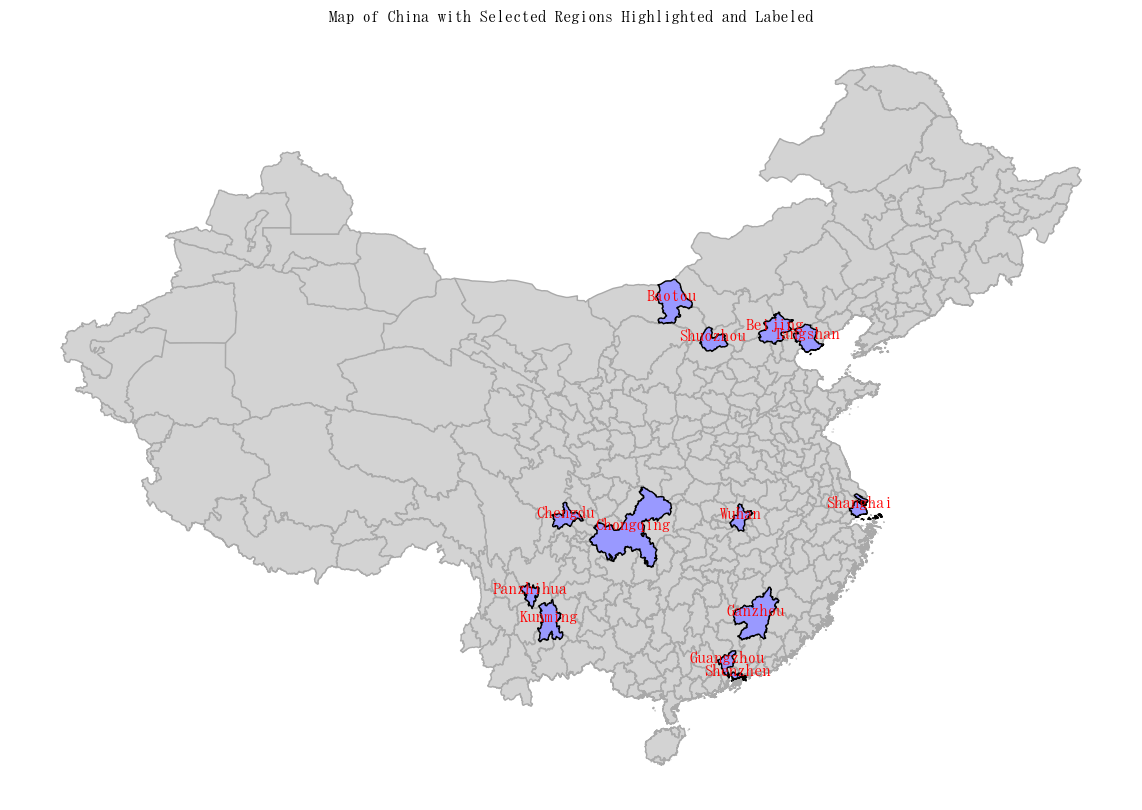

In [264]:
show_region(['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chengdu', 'Chongqing', 'Wuhan', 'Kunming', 'Panzhihua', 'Shuozhou', 'Baotou', 'Ganzhou', 'Tangshan'])

# Beijing: Capital City
# Shanghai: port city
# Guangzhou: capital city of Guangdong, Canton Fair (spring and autumn), best commercial city in the world by Forbes
# Shenzhen: tech capital
# Chengdu: Aerospace, Coastal City, Tier-2, Regional Development, Urban-Rural Mix
# Chongqing: Yangtze River, largest area, for infrastructure, logistics
# Wuhan: COVID, steel and heavy industry
# Kunming: Tourism and Floriculture
# Panzhihua: Steel, Mining, Metallurgy, Strategic Metals
# Shuozhou: Coal Capital of N.China
# Baotou: Bayan Obo, Rare Earth (radioactive thorium byproducts)
# Ganzhou: Also Rare Earth (mining method: in-situ leaching)

# Agriculture sector?

In [259]:
china.loc[china['NAME_1']=='NeiMongol']

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,label,label_pos
228,CHN.19.1_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Alxa,Ālāshàn,阿拉善盟,Méng,League,NA,NA,"MULTIPOLYGON (((104.2753 37.4281, 104.2476 37....",Alxa,"[103.21410191804708, 40.084649999999996]"
229,CHN.19.2_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Baotou,Bāotóu,包头市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((110.4057 40.7133, 110.4159 40....",Baotou,"[110.3995574708793, 41.60315]"
230,CHN.19.3_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Baynnur,Bāyànnào'ěr,巴彦淖尔市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((106.8257 40.1983, 106.8126 40....",Baynnur,"[107.47825187793427, 41.316950000000006]"
231,CHN.19.4_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Chifeng,Chìfēng,赤峰市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((118.3737 41.3099, 118.3588 41....",Chifeng,"[118.50405564516129, 43.2291]"
232,CHN.19.5_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Hohhot,Hūhéhàotè,呼和浩特市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((112.0853 39.9577, 112.0785 39....",Hohhot,"[111.22353914004323, 40.486900000000006]"
233,CHN.19.6_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Hulunbuir,Hūlúnbèi'ěr,呼伦贝尔市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((120.4752 47.5499, 120.4668 47....",Hulunbuir,"[122.38733619047619, 50.240899999999996]"
234,CHN.19.7_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Ordos,È'ěrduōsī,鄂尔多斯市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((109.6748 38.945, 109.6736 38.9...",Ordos,"[108.44308414159983, 39.24195]"
235,CHN.19.8_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Tongliao,Tōngliáo,通辽市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((121.8572 42.5402, 121.8561 42....",Tongliao,"[122.07691716571875, 43.9576]"
236,CHN.19.9_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,UlaanChab,Wūlánchábù,乌兰察布市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((112.0587 40.6546, 112.0912 40....",UlaanChab,"[112.63635904235646, 41.780649999999994]"
237,CHN.19.10_1,CHN,China,CHN.19_1,NeiMongol,內蒙古自治區|内蒙古自治区,Wuhai,Wūhǎi,乌海市,Dìjíshì,PrefectureCity,NA,NA,"MULTIPOLYGON (((106.7492 39.3809, 106.7336 39....",Wuhai,"[106.92527085550117, 39.58865]"


In [260]:
china.NAME_1

0         Anhui
1         Anhui
2         Anhui
3         Anhui
4         Anhui
         ...   
363    Zhejiang
364    Zhejiang
365    Zhejiang
366    Zhejiang
367    Zhejiang
Name: NAME_1, Length: 368, dtype: object